# Temporal Map of Land Use in Chinatown

## By Brian Kohaya

### These maps looks at how the land use in Chinatown has changed over the past 15 years. We will be using the years 2006, 2010, 2014, 2018, and 2021

In [164]:
# Importing Libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx

## Upload the Data

In [166]:
AD06 = gpd.read_file('AD06.geojson')

In [167]:
AD10 = gpd.read_file('Assessor2010.txt')

In [168]:
AD14 = gpd.read_file('Assessor2014.txt')

In [169]:
AD18 = gpd.read_file('Assessor2018.txt')

In [170]:
AD21 = gpd.read_file('Assessor2021.txt')

In [242]:
### I will begin by using the 2006 data and then incorporate the other years later

In [171]:
AD06.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 142 columns):
 #    Column                       Dtype              
---   ------                       -----              
 0    OBJECTID_1                   float64            
 1    AIN                          object             
 2    APN                          object             
 3    SitusHouse                   object             
 4    SitusFract                   object             
 5    SitusDirec                   object             
 6    SitusUnit                    object             
 7    SitusStree                   object             
 8    SitusAddre                   object             
 9    SitusCity                    object             
 10   SitusZIP                     object             
 11   SitusFullA                   object             
 12   TaxRateAre                   object             
 13   TaxRateCit                   object             
 14 

In [173]:
AD06.head(3)

OBJECTID_1         AIN           APN SitusHouse SitusFract SitusDirec  \
0   1245695.0  5414007015  5414-007-015        999       None          N   
1   1244222.0  5406028127  5406-028-127        918       None          W   
2   1244952.0  5409016030  5409-016-030        908       None       None   

  SitusUnit  SitusStree              SitusAddre       SitusCity  ...  \
0      None    BROADWAY          999 N BROADWAY  LOS ANGELES CA  ...   
1       317  COLLEGE ST  918 W COLLEGE ST   317  LOS ANGELES CA  ...   
2      None    AVILA ST            908 AVILA ST  LOS ANGELES CA  ...   

  StreetDirection  StreetName UnitNo            City ZIPcode5           rowID  \
0               N    BROADWAY         LOS ANGELES CA  90012.0  20065414007015   
1               W  COLLEGE ST    317  LOS ANGELES CA  90012.0  20065406028127   
2                    AVILA ST         LOS ANGELES CA  90012.0  20065409016030   

  CENTER_LAT_y CENTER_LON_y                    Location 1  \
0    34.066669  -118.236365  (34.06666874, -118.23636466)   
1    34.066379  -118.245243  (34.06637901, -118.24524342)   
2    34.057575  -118.232612   (34.0575754, -118.23261206)   

                                            geometry  
0  POLYGON Z ((-118.23615 34.06662 0.00000, -118....  
1  POLYGON Z ((-118.24515 34.06608 0.00000, -118....  
2  POLYGON Z ((-118.23247 34.05774 0.00000, -118....  

[3 rows x 142 columns]

# Clip the Data to make the charts looks prettier and easier to read

In [202]:
columns_to_keep = ['SitusAddre','UseType', 'UseDescrip', 'CENTER_LAT_y', 'CENTER_LON_y', 'geometry']

In [203]:
AD06_clipped = AD06[columns_to_keep]

In [204]:
AD06_clipped.head()

SitusAddre      UseType           UseDescrip  CENTER_LAT_y  \
0          999 N BROADWAY   Commercial       Hotel & Motels     34.066669   
1  918 W COLLEGE ST   317  Residential               Single     34.066379   
2            908 AVILA ST   Industrial  Heavy Manufacturing     34.057575   
3    716 NEW DEPOT ST   A  Residential               Single     34.064930   
4           734 N HILL PL  Residential            Two Units     34.062405   

   CENTER_LON_y                     geometry  
0   -118.236365  POINT (-118.23636 34.06667)  
1   -118.245243  POINT (-118.24524 34.06638)  
2   -118.232612  POINT (-118.23261 34.05758)  
3   -118.242581  POINT (-118.24258 34.06493)  
4   -118.242174  POINT (-118.24217 34.06240)

In [205]:
AD06_01 = AD06[columns_to_keep]

In [206]:
columns = list(AD06_01)
columns

['SitusAddre',
 'UseType',
 'UseDescrip',
 'CENTER_LAT_y',
 'CENTER_LON_y',
 'geometry']

In [207]:
AD06_01.columns = ['Site Address',
                  'Use Type',
                  'Use Description',
                   'Lat',
                   'Long',
                  'geometry']

In [221]:
AD06_01.sample(5)

Site Address     Use Type                Use Description  \
9                        None   Government              Government Parcel   
195            850 N BROADWAY   Commercial           Banks Savings & Loan   
929  943 FIGUEROA TER   NO 17  Residential                         Single   
683            960 N BROADWAY   Commercial  Restaurants, Cocktail Lounges   
91          970 CHUNG KING RD   Commercial              Store Combination   

           Lat        Long                     geometry  
9    34.063025 -118.245695  POINT (-118.24570 34.06302)  
195  34.063553 -118.237180  POINT (-118.23718 34.06355)  
929  34.067729 -118.243363  POINT (-118.24336 34.06773)  
683  34.065509 -118.236273  POINT (-118.23627 34.06551)  
91   34.066433 -118.238127  POINT (-118.23813 34.06643)

### Counting Number of Unique Items in the UseType and UseDescrip columns 

In [210]:
AD06_clipped.count()

SitusAddre       953
UseType         1092
UseDescrip      1092
CENTER_LAT_y    1095
CENTER_LON_y    1095
geometry        1095
dtype: int64

In [211]:
print(AD06.UseType.value_counts())

Residential      544
Commercial       333
Industrial       116
Government        41
Miscellaneous     36
Institutional     12
Recreational      10
Name: UseType, dtype: int64


In [212]:
AD06_Unique = AD06.UseType.value_counts()

In [246]:
AD06_Unique2 = AD06.UseDescrip.value_counts()

In [213]:
import plotly.express as px

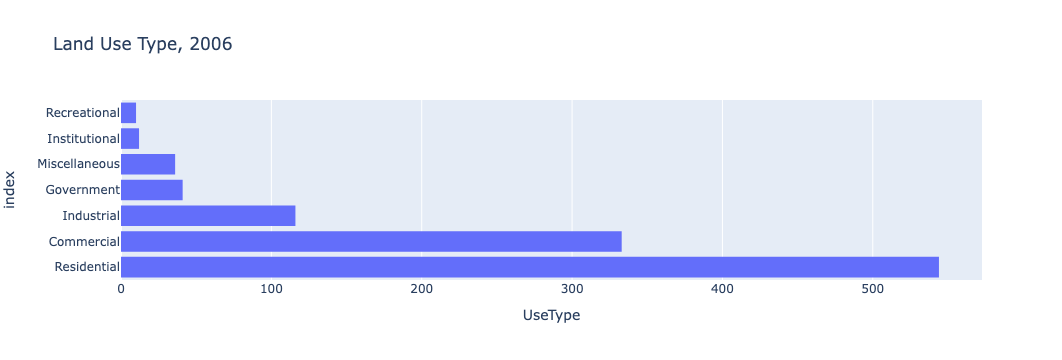

In [214]:
# a simple bar chart, putting date on the x-axis
fig = px.bar(AD06_Unique,
       x='UseType',
       title='Land Use Type, 2006'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

In [215]:
print(AD06.UseDescrip.value_counts())

Single                                                           300
Five or more apartments                                          124
Store Combination                                                105
Two Units                                                         64
Stores                                                            52
Government Parcel                                                 41
Lgt Manf.Sm. EQPT. Manuf Sm.Shps Instr.Manuf. Prnt Plnts          41
Office Buildings                                                  41
Parking Lots (Commercial Use Properties)                          40
Industrial                                                        37
Four Units (Any Combination)                                      30
Utility Commercial & Mutual: Pumping Plants State Assessed Pr     29
Commercial                                                        29
Three Units (Any Combination)                                     24
Restaurants, Cocktail Lounges     

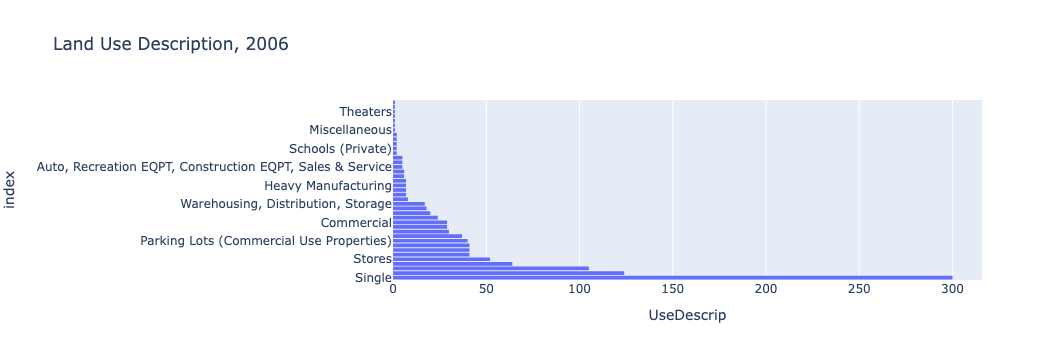

In [248]:
# a simple bar chart, putting date on the x-axis
fig = px.bar(AD06_Unique2,
       x='UseDescrip',
       title='Land Use Description, 2006'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

In [ ]:
# Mapping Plots by Land Use

In [222]:
AD06_residential = AD06_clipped[columns_to_keep].copy()
AD06_residential = AD06_residential[AD06_clipped.UseType == 'Residential']
AD06_residential

SitusAddre      UseType               UseDescrip  \
1       918 W COLLEGE ST   317  Residential                   Single   
3         716 NEW DEPOT ST   A  Residential                   Single   
4                734 N HILL PL  Residential                Two Units   
5     943 FIGUEROA TER   NO 11  Residential                   Single   
8             714 W COLLEGE ST  Residential  Five or more apartments   
...                        ...          ...                      ...   
1086             813 ALPINE ST  Residential  Five or more apartments   
1087             720 N HILL PL  Residential  Five or more apartments   
1088    918 W COLLEGE ST   409  Residential                   Single   
1091  912 CENTENNIAL ST   NO 4  Residential                   Single   
1094   909 NEW DEPOT ST   NO 4  Residential                   Single   

      CENTER_LAT_y  CENTER_LON_y                     geometry  
1        34.066379   -118.245243  POINT (-118.24524 34.06638)  
3        34.064930   -118.242581  POINT (-118.24258 34.06493)  
4        34.062405   -118.242174  POINT (-118.24217 34.06240)  
5        34.067729   -118.243363  POINT (-118.24336 34.06773)  
8        34.065239   -118.241756  POINT (-118.24176 34.06524)  
...            ...           ...                          ...  
1086     34.064123   -118.244305  POINT (-118.24430 34.06412)  
1087     34.062005   -118.242201  POINT (-118.24220 34.06200)  
1088     34.066379   -118.245243  POINT (-118.24524 34.06638)  
1091     34.067160   -118.245279  POINT (-118.24528 34.06716)  
1094     34.066012   -118.245609  POINT (-118.24561 34.06601)  

[544 rows x 6 columns]

In [223]:
AD06_commercial = AD06_clipped[columns_to_keep].copy()
AD06_commercial = AD06_commercial[AD06_clipped.UseType == 'Commercial']
AD06_commercial

SitusAddre     UseType  \
0              999 N BROADWAY  Commercial   
7                        None  Commercial   
11          977 CHUNG KING RD  Commercial   
19     767 N HILL ST   NO 413  Commercial   
24     767 N HILL ST   NO 307  Commercial   
...                       ...         ...   
1080      953 1/2 N VIGNES ST  Commercial   
1083   767 N HILL ST   NO 205  Commercial   
1085           951 N BROADWAY  Commercial   
1090        955 CHUNG KING RD  Commercial   
1092  818 N BROADWAY   NO 114  Commercial   

                                      UseDescrip  CENTER_LAT_y  CENTER_LON_y  \
0                                 Hotel & Motels     34.066669   -118.236365   
7       Parking Lots (Commercial Use Properties)     34.065052   -118.238150   
11                             Store Combination     34.066729   -118.238201   
19                              Office Buildings     34.062669   -118.240034   
24                              Office Buildings     34.062669   -118.240034   
...                                          ...           ...           ...   
1080                            Office Buildings     34.058046   -118.232266   
1083                                      Stores     34.062669   -118.240034   
1085                        Banks Savings & Loan     34.065557   -118.236996   
1090                           Store Combination     34.066119   -118.238535   
1092  Shopping Centers (Neighborhood, community)     34.062848   -118.237540   

                         geometry  
0     POINT (-118.23636 34.06667)  
7     POINT (-118.23815 34.06505)  
11    POINT (-118.23820 34.06673)  
19    POINT (-118.24003 34.06267)  
24    POINT (-118.24003 34.06267)  
...                           ...  
1080  POINT (-118.23227 34.05805)  
1083  POINT (-118.24003 34.06267)  
1085  POINT (-118.23700 34.06556)  
1090  POINT (-118.23854 34.06612)  
1092  POINT (-118.23754 34.06285)  

[333 rows x 6 columns]

In [224]:
AD06_industrial = AD06_clipped[columns_to_keep].copy()
AD06_industrial = AD06_industrial[AD06_clipped.UseType == 'Industrial']
AD06_industrial

SitusAddre     UseType  \
2          908 AVILA ST  Industrial   
12                 None  Industrial   
25      111 W ELMYRA ST  Industrial   
26     1510 N SPRING ST  Industrial   
35     1721 N SPRING ST  Industrial   
...                 ...         ...   
1051    676 N SPRING ST  Industrial   
1059               None  Industrial   
1070  1033 ALHAMBRA AVE  Industrial   
1078     1457 N MAIN ST  Industrial   
1093    126 W ELMYRA ST  Industrial   

                                             UseDescrip  CENTER_LAT_y  \
2                                   Heavy Manufacturing     34.057575   
12    Lgt Manf.Sm. EQPT. Manuf Sm.Shps Instr.Manuf. ...     34.068601   
25    Lgt Manf.Sm. EQPT. Manuf Sm.Shps Instr.Manuf. ...     34.064909   
26    Lgt Manf.Sm. EQPT. Manuf Sm.Shps Instr.Manuf. ...     34.067663   
35    Lgt Manf.Sm. EQPT. Manuf Sm.Shps Instr.Manuf. ...     34.070008   
...                                                 ...           ...   
1051                 Warehousing, Distribution, Storage     34.059223   
1059           Parking Lots (Industrial Use Properties)     34.066557   
1070                                Heavy Manufacturing     34.061777   
1078                             Food Processing Plants     34.065902   
1093           Parking Lots (Industrial Use Properties)     34.064986   

      CENTER_LON_y                     geometry  
2      -118.232612  POINT (-118.23261 34.05758)  
12     -118.231234  POINT (-118.23123 34.06860)  
25     -118.232129  POINT (-118.23213 34.06491)  
26     -118.230416  POINT (-118.23042 34.06766)  
35     -118.226702  POINT (-118.22670 34.07001)  
...            ...                          ...  
1051   -118.237860  POINT (-118.23786 34.05922)  
1059   -118.232211  POINT (-118.23221 34.06656)  
1070   -118.233828  POINT (-118.23383 34.06178)  
1078   -118.230095  POINT (-118.23010 34.06590)  
1093   -118.232840  POINT (-118.23284 34.06499)  

[116 rows x 6 columns]

In [231]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(AD06, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(AD06.CENTER_LON_y, AD06.CENTER_LAT_y))

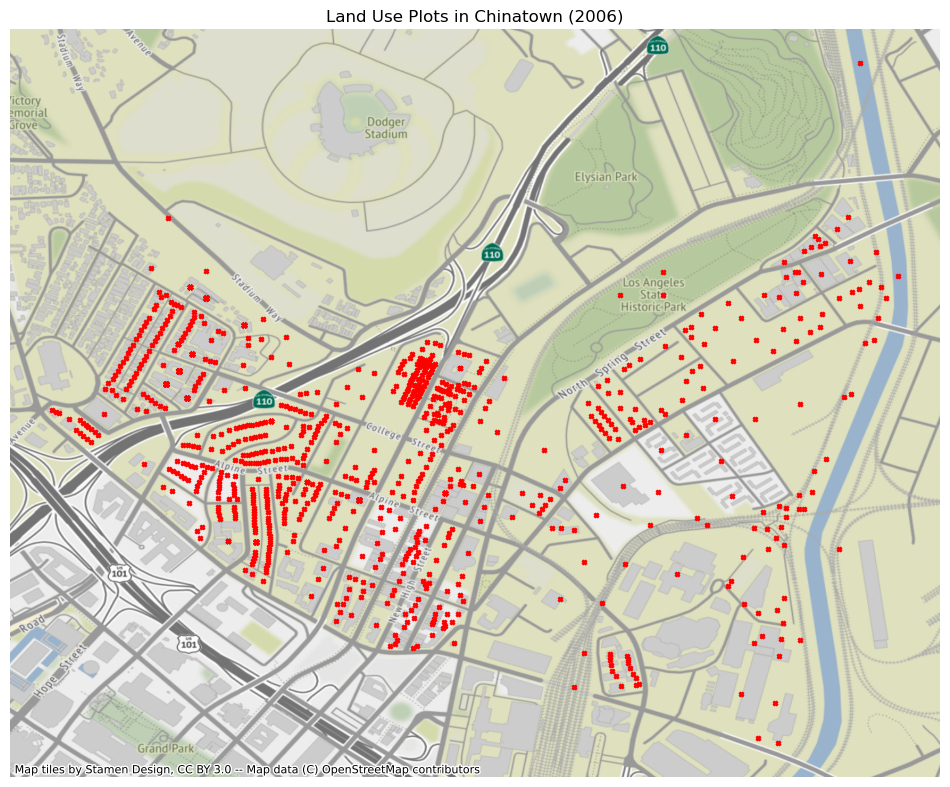

In [232]:
# start the plot
fig, ax = plt.subplots(figsize=(12,12))

# add the data options
gdf.plot(ax=ax, 
        marker='X',
        markersize=10,
        color= 'red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Land Use Plots in Chinatown (2006)')

# add a basemap
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)

In [227]:
UseTypeS2 = ["AD06_residential", "AD06_commercial", "AD06_industrial"]

In [230]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf_residential = gpd.GeoDataFrame(AD06_residential, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(AD06_residential.CENTER_LON_y, AD06_residential.CENTER_LAT_y))

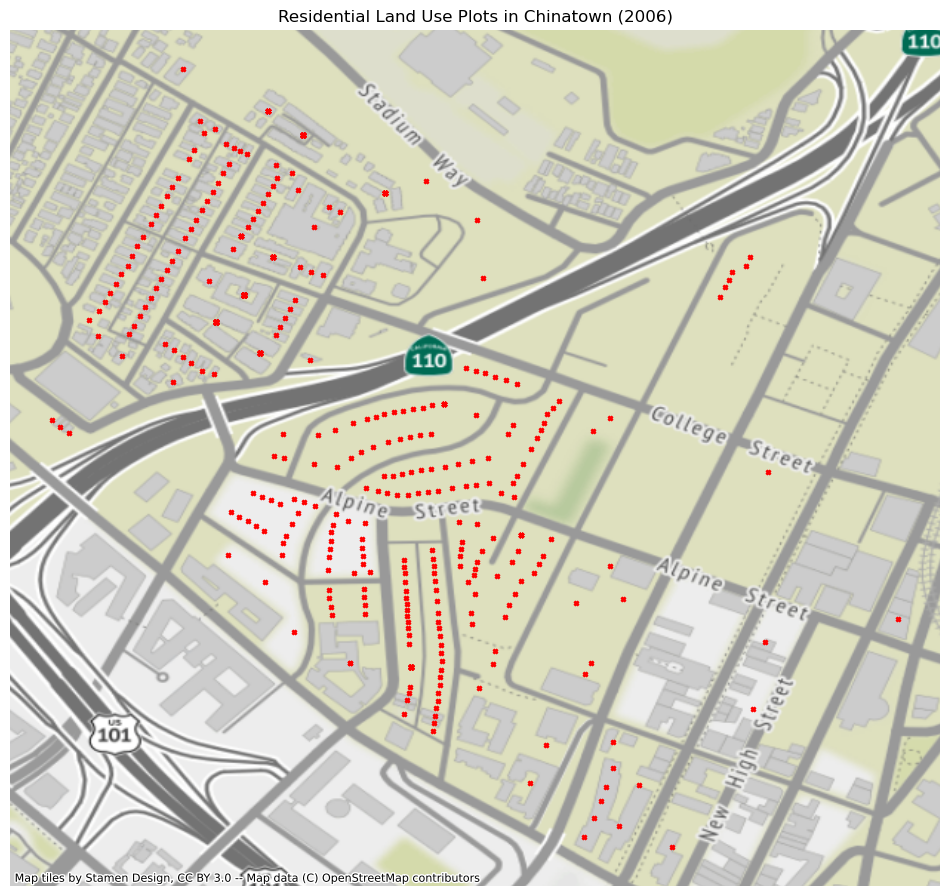

In [234]:
# start the plot
fig, ax = plt.subplots(figsize=(12,12))

# add the data options
gdf_residential.plot(ax=ax, 
        marker='X',
        markersize=10,
        color= 'red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Residential Land Use Plots in Chinatown (2006)')

# add a basemap
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)

In [238]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf_commercial = gpd.GeoDataFrame(AD06_commercial, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(AD06_commercial.CENTER_LON_y, AD06_commercial.CENTER_LAT_y))

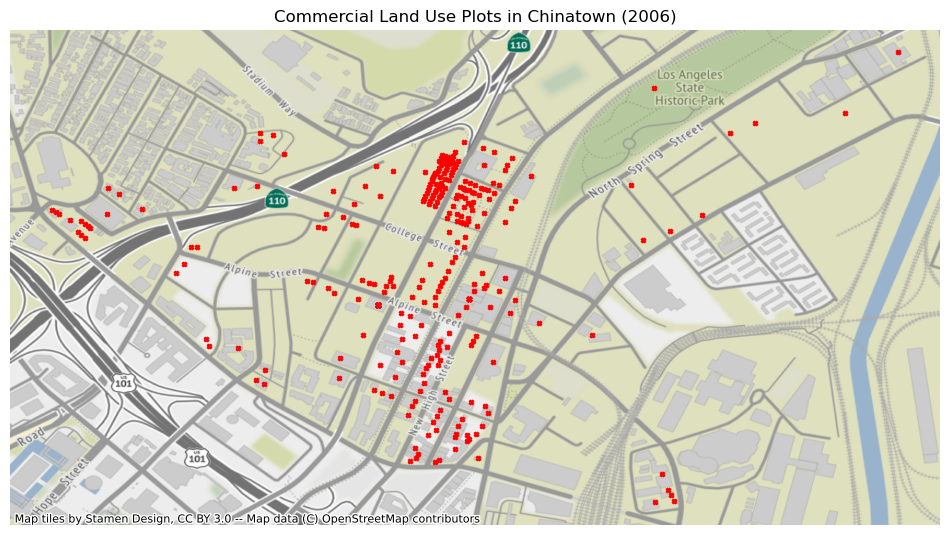

In [239]:
# start the plot
fig, ax = plt.subplots(figsize=(12,12))

# add the data options
gdf_commercial.plot(ax=ax, 
        marker='X',
        markersize=10,
        color= 'red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Commercial Land Use Plots in Chinatown (2006)')

# add a basemap
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)

In [240]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf_industrial = gpd.GeoDataFrame(AD06_industrial, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(AD06_industrial.CENTER_LON_y, AD06_industrial.CENTER_LAT_y))

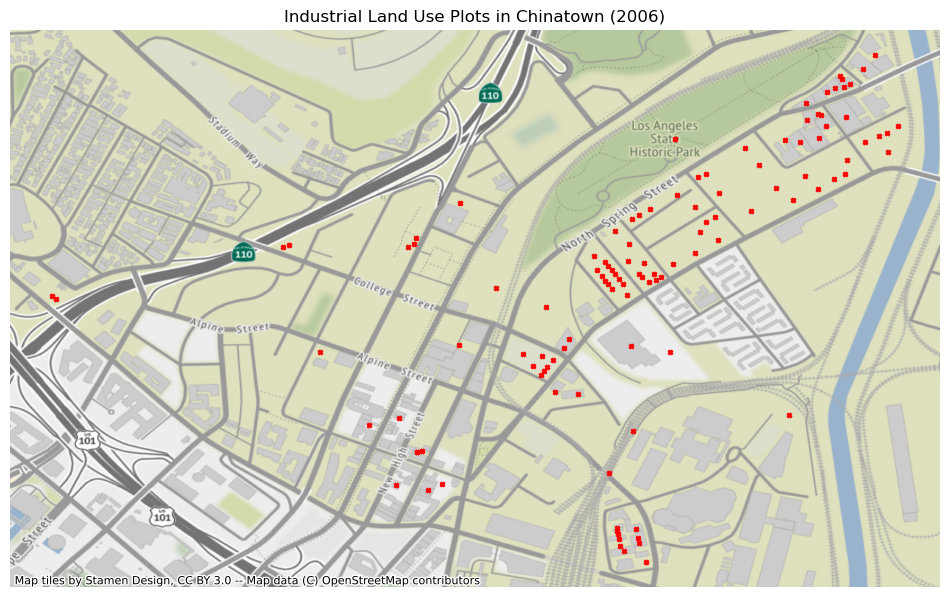

In [241]:
# start the plot
fig, ax = plt.subplots(figsize=(12,12))

# add the data options
gdf_industrial.plot(ax=ax, 
        marker='X',
        markersize=10,
        color= 'red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Industrial Land Use Plots in Chinatown (2006)')

# add a basemap
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)

### Attempting to create a loop to track data over years 

In [277]:
Years = ["2010", "2014", "2018", "2021"]

In [278]:
str(Years)

"['2010', '2014', '2018', '2021']"

In [281]:
# Create an array of all years of assessor data using for loop
parcel_dataframes = []

for year in Years:
    parcel_data_filepath = "Assessor" + str(year) + ".txt"
    parcel_dataframe_raw = gpd.read_file(parcel_data_filepath)
    parcel_dataframe = parcel_dataframe_raw[columns_to_keep].copy()
    parcel_dataframe['Years'] = year
    parcel_dataframes.append(parcel_dataframe)

print(parcel_dataframes[0].info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SitusAddre    963 non-null    object  
 1   UseType       1105 non-null   object  
 2   UseDescrip    1105 non-null   object  
 3   CENTER_LAT_y  1108 non-null   float64 
 4   CENTER_LON_y  1108 non-null   float64 
 5   geometry      1108 non-null   geometry
 6   Years         1108 non-null   object  
dtypes: float64(2), geometry(1), object(4)
memory usage: 60.7+ KB
None


In [288]:
print(parcel_dataframes[3].sample(5))

                     SitusAddre      UseType  \
976      918 W COLLEGE ST   102  Residential   
319             837 N SPRING ST   Commercial   
19             821 CLEVELAND ST  Residential   
864      767 N HILL ST   NO 206   Commercial   
18   630 N GRAND AVE   UNIT 101  Residential   

                                     UseDescrip  CENTER_LAT_y  CENTER_LON_y  \
976                                      Single     34.066384   -118.245256   
319  Shopping Centers (Neighborhood, community)     34.063058   -118.236739   
19                      Five or more apartments     34.064130   -118.241545   
864                            Office Buildings     34.062674   -118.240046   
18                                       Single     34.061436   -118.243035   

                                              geometry Years  
976  POLYGON Z ((-118.24515 34.06608 0.00000, -118....  2021  
319  POLYGON Z ((-118.23654 34.06292 0.00000, -118....  2021  
19   POLYGON Z ((-118.24131 34.06417 0.00000, -

In [301]:
for parcel_dataframe in parcel_dataframes:
    
    loop = ['gdf' + str(Years)]
    loop = gpd.GeoDataFrame(AD06, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(AD06.CENTER_LON_y, AD06.CENTER_LAT_y))

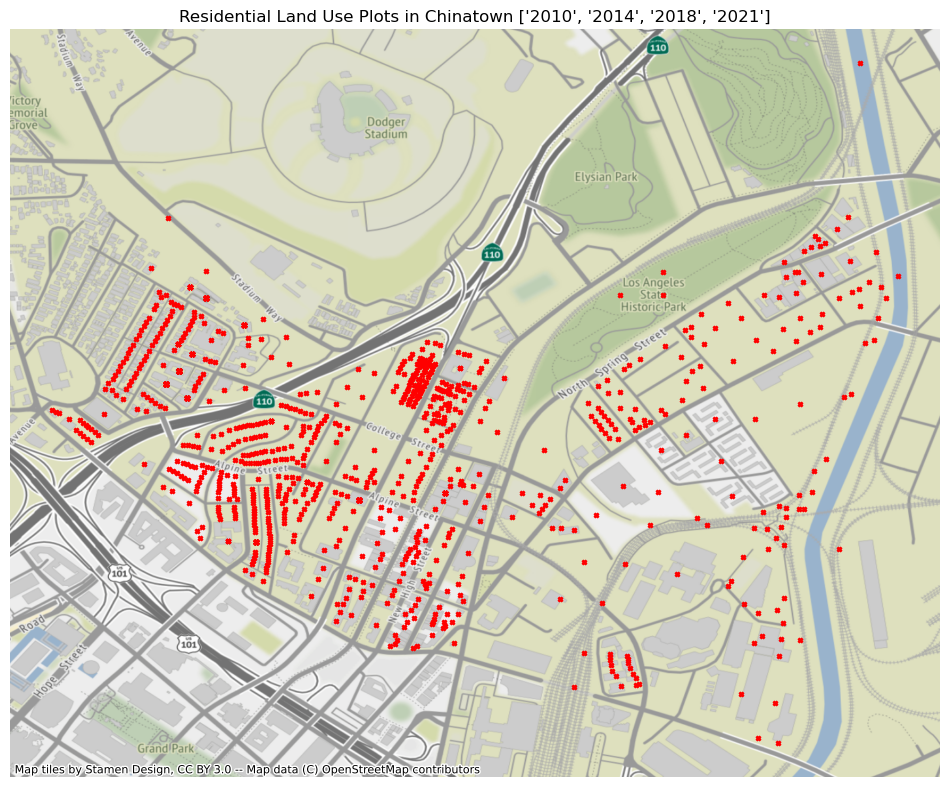

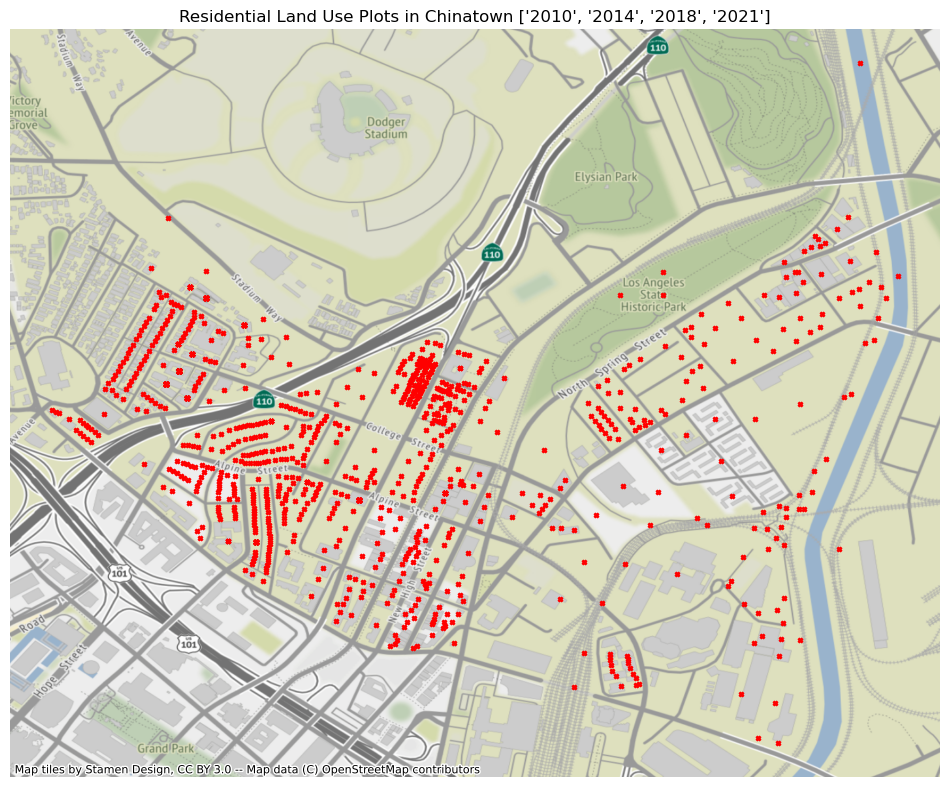

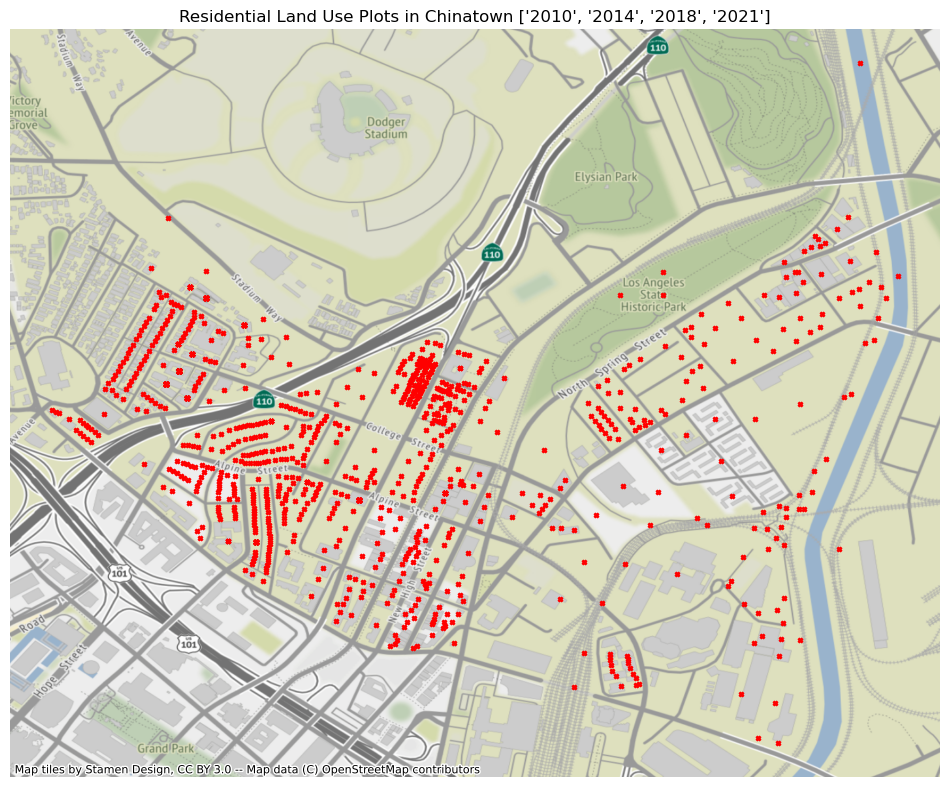

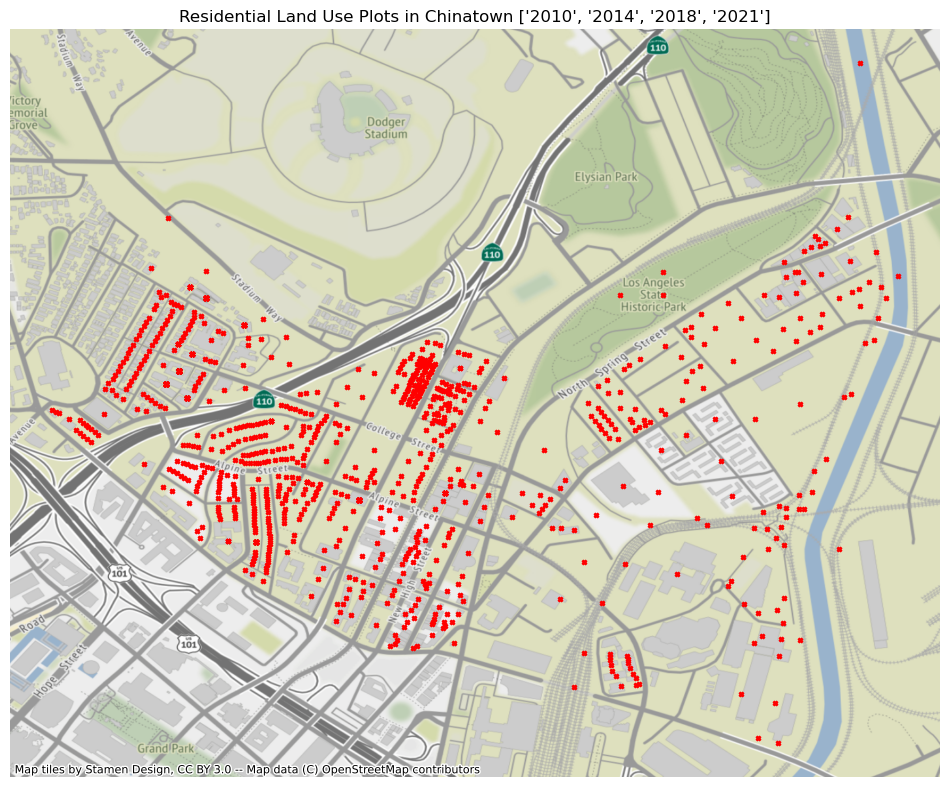

In [304]:
for parcel_dataframe in parcel_dataframes:
    
    # start the plot
    fig, ax = plt.subplots(figsize=(12,12))

    # add the data options
    loop.plot(ax=ax, 
        marker='X',
        markersize=10,
        color= 'red')

    # turn the axes off
    ax.axis('off')

    # give it a title
    ax.set_title('Residential Land Use Plots in Chinatown ' + str(Years))

    # add a basemap
    ctx.add_basemap(ax, crs=4326) 

### Right now Im stuck on trying to get a specific type of land usage to show up in the loop. I will reach out to office hours soon to try to get assistance. 